# Practical Application Assignment 17.1

## **Overview**

In this practical application, the objective is to explore a marketing dataset from a portugese banking institution. Additionally,in this practical application need to compare and contrast the performance of various classification models (Logistic Regression, K-Nearest Neighbors, SVM, and Decision Trees) to determine which performs best when predicting client churn.


## **Business Understanding**

The business problem in this scenario is to look at various features of people who were contacted in regards to a marketing campaign and predict if they would subscribe a term deposit.  By predicting if a person contacted as part of this marketing campaign will subscribe a term deposit, it would be possible for marketing to efficiently increase churn rates by focusing on reaching out to potential who are predicted to subscribe a term deposit.  


## Data **Understanding**

In [161]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc, precision_recall_curve
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report
import time

In [162]:
from sklearn.datasets import load_digits

In [163]:
#Load Bank Data and Make Sure Loaded Properly
bank = pd.read_csv('data/bank.csv', sep=';')
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [164]:
#Check Columns, Null Count, and Datatypes
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


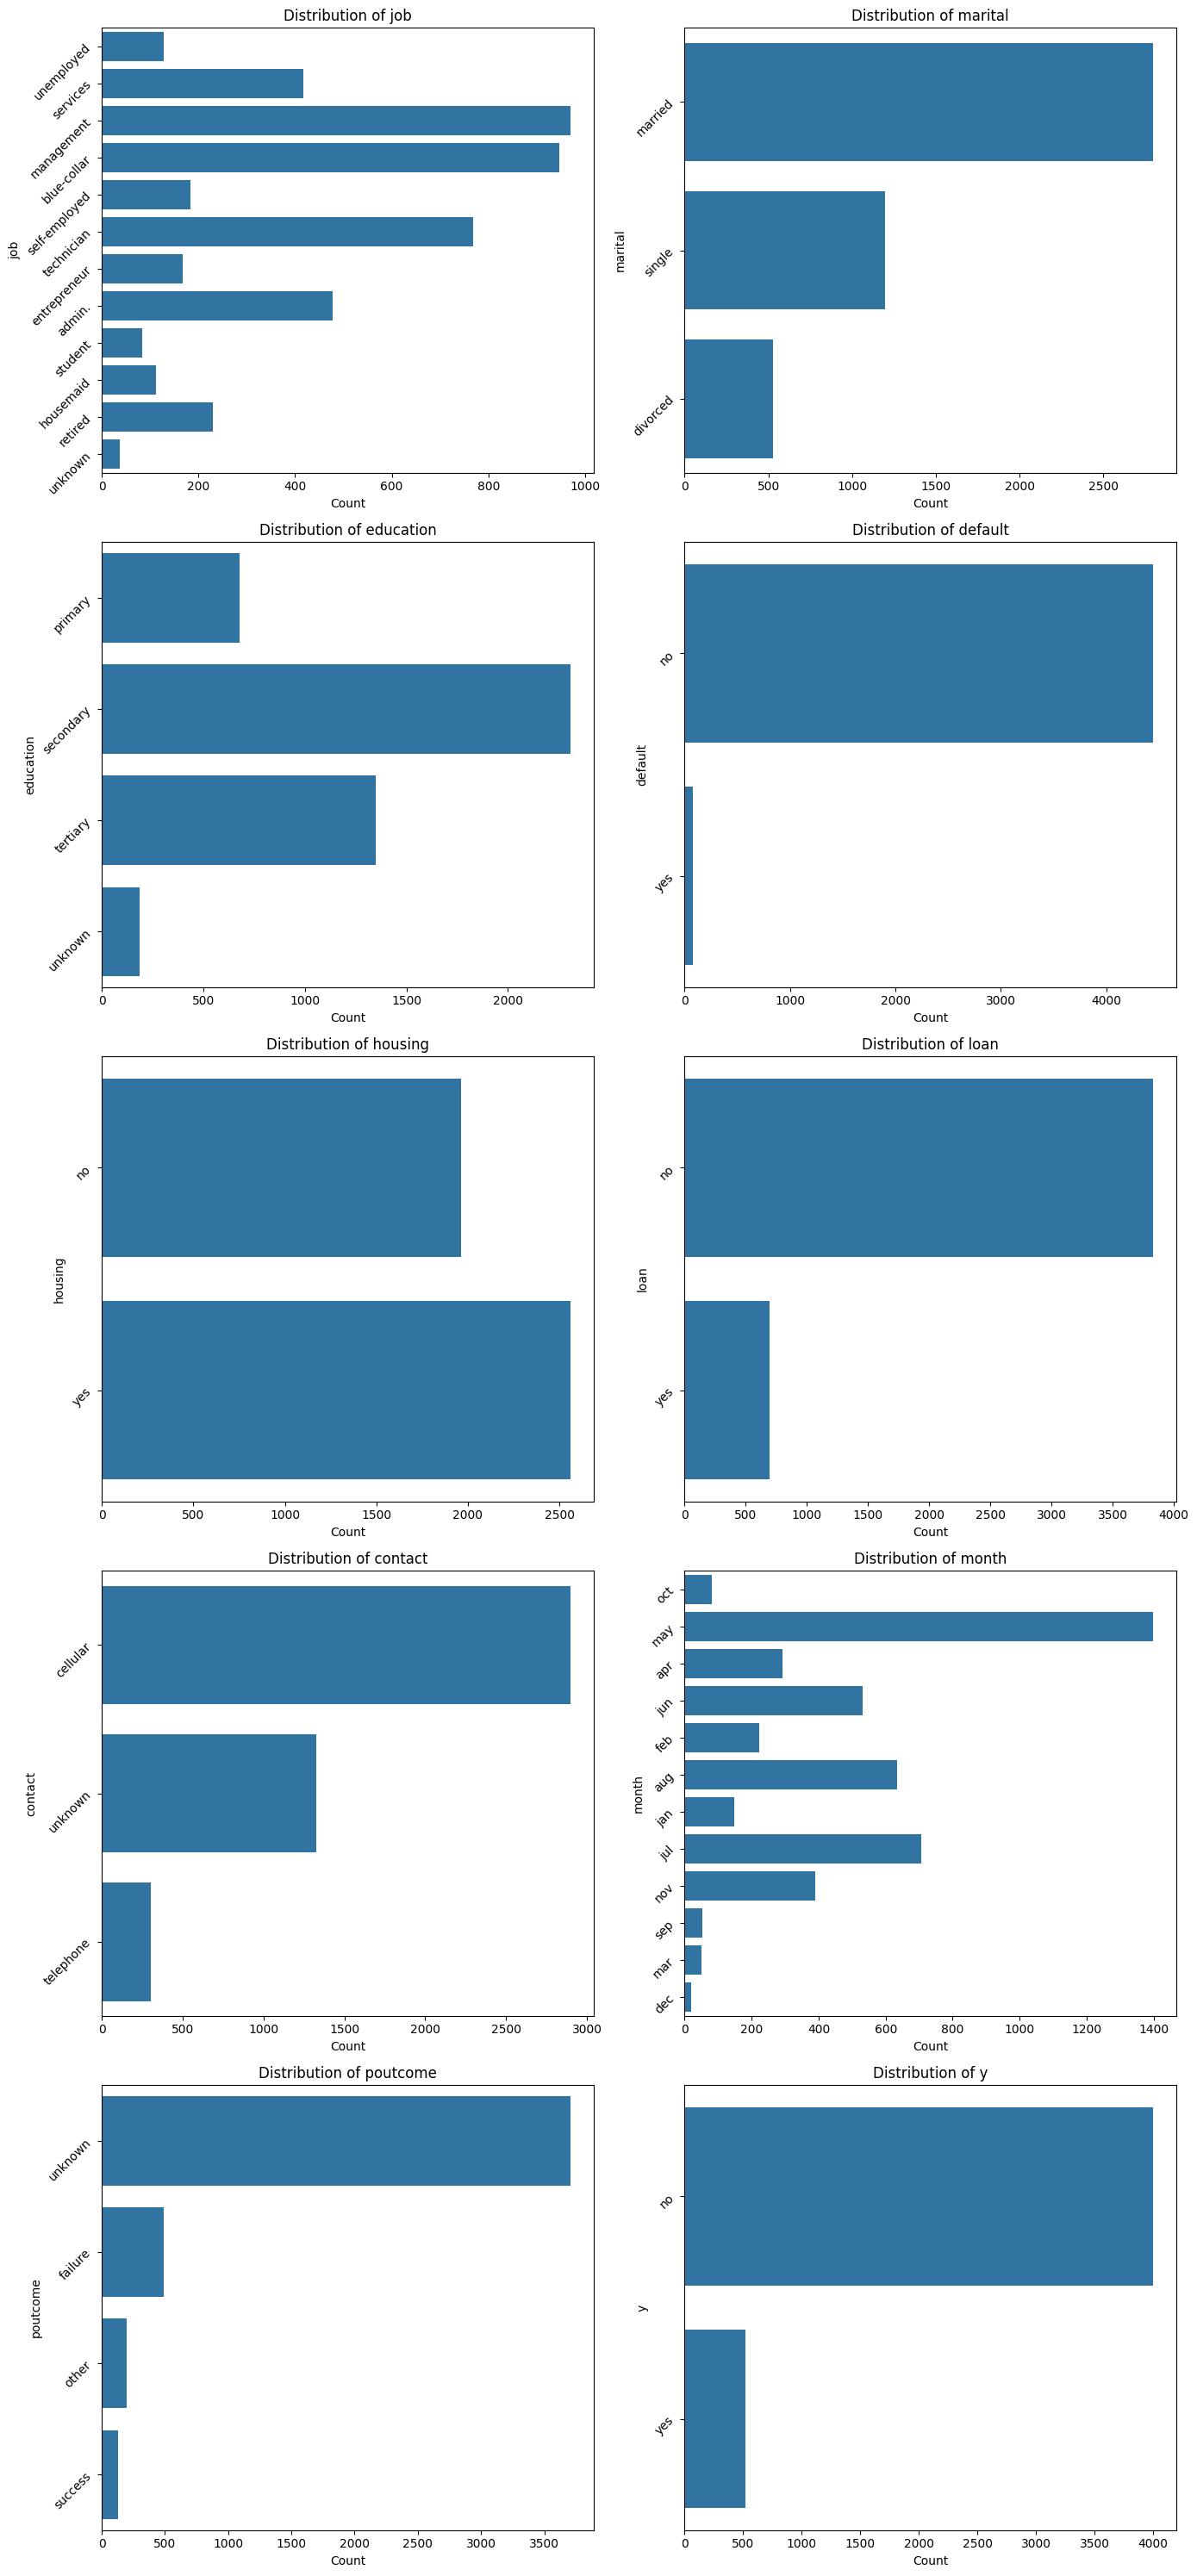

In [165]:
#Visualizations For Exploration of Categorical Data
categorical_cols = bank.select_dtypes(include=['object']).columns
num_categorical_cols = len(categorical_cols)

fig, axes = plt.subplots(nrows=(num_categorical_cols + 1) // 2, ncols=2, figsize=(14, num_categorical_cols * 3))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    sns.countplot(y=col, data=bank, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel('Count')
    axes[i].set_ylabel(col)
    axes[i].tick_params(axis='x', rotation=0)
    axes[i].tick_params(axis='y', rotation=45)

plt.tight_layout()
plt.show()

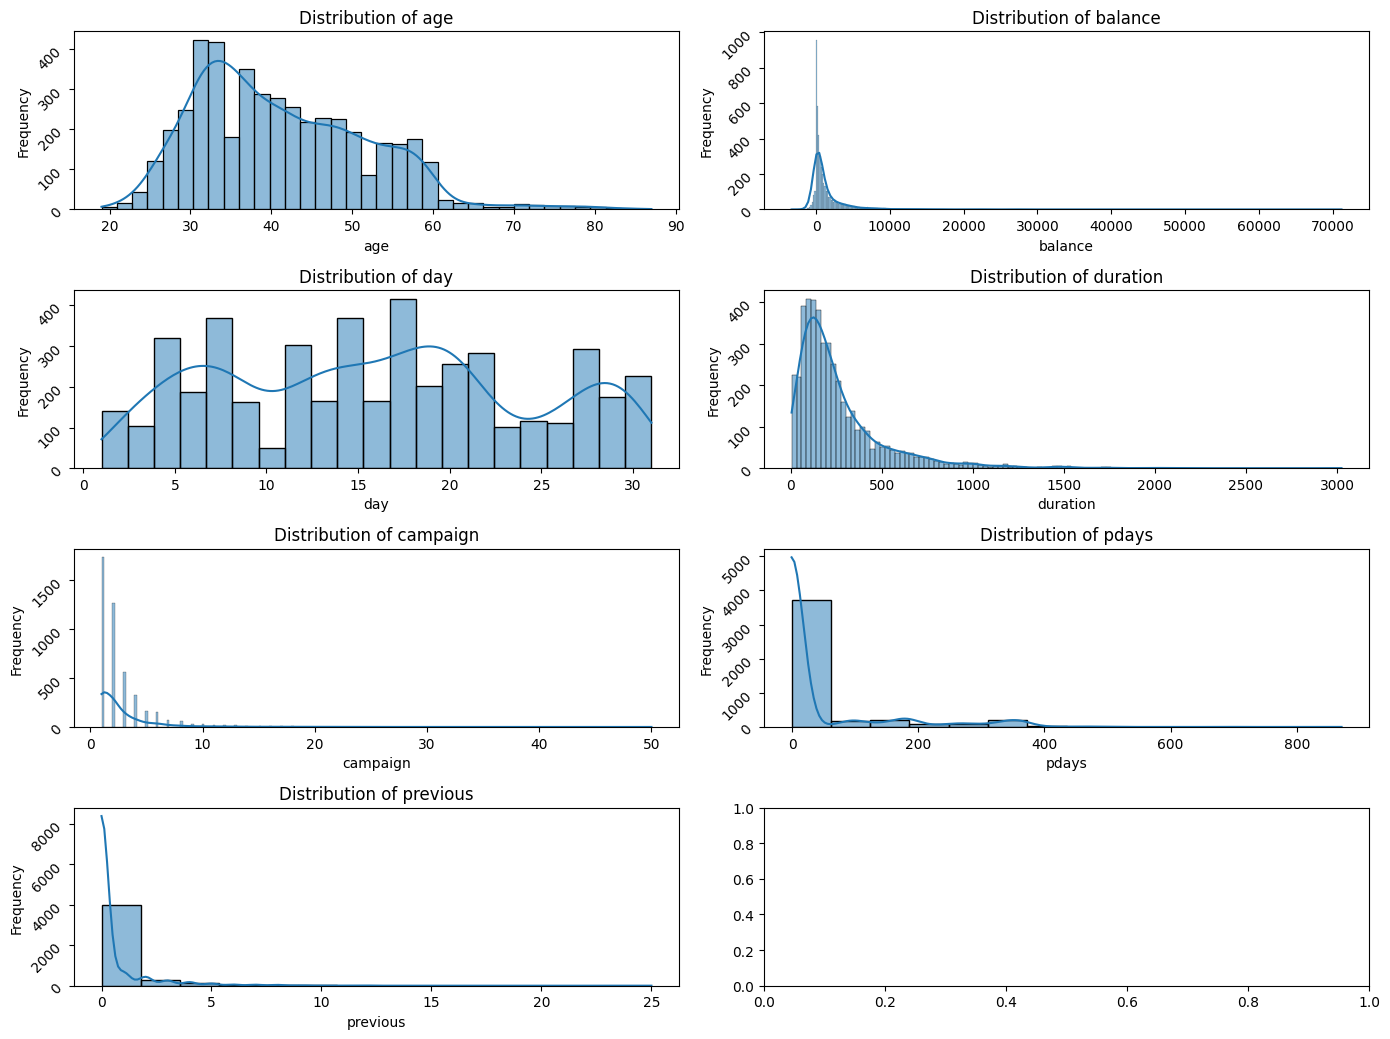

In [166]:
# Visualizations for Numerical Data
numerical_cols = bank.select_dtypes(include=['int64'])
num_numerical_cols = len(numerical_cols.columns) # Get the number of columns instead of rows

# Reduce the figure size and increase the number of rows
fig, axes = plt.subplots(nrows=(num_numerical_cols + 1) // 2, ncols=2, figsize=(14, num_numerical_cols * 1.5))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.histplot(bank[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
    axes[i].tick_params(axis='x', rotation=0)
    axes[i].tick_params(axis='y', rotation=45)

plt.tight_layout()
plt.show()

## **Data Preparation**

Converted all categorical data into numerical data so it can be used with classification models. Additionally, verified that there are no missing or null values present in data.

In [167]:
#Convert all columns with categorical data into numerical data
bank['job'] = bank['job'].astype('category').cat.codes
bank['marital'] = bank['marital'].astype('category').cat.codes
bank['education'] = bank['education'].astype('category').cat.codes
bank['default'] = bank['default'].astype('category').cat.codes
bank['housing'] = bank['housing'].astype('category').cat.codes
bank['loan'] = bank['loan'].astype('category').cat.codes
bank['contact'] = bank['contact'].astype('category').cat.codes
bank['month'] = bank['month'].astype('category').cat.codes
bank['poutcome'] = bank['poutcome'].astype('category').cat.codes
bank['y'] = bank['y'].astype('category').cat.codes

#Check Data To Ensure Coverted Correctly
#bank.head()
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        4521 non-null   int64
 1   job        4521 non-null   int8 
 2   marital    4521 non-null   int8 
 3   education  4521 non-null   int8 
 4   default    4521 non-null   int8 
 5   balance    4521 non-null   int64
 6   housing    4521 non-null   int8 
 7   loan       4521 non-null   int8 
 8   contact    4521 non-null   int8 
 9   day        4521 non-null   int64
 10  month      4521 non-null   int8 
 11  duration   4521 non-null   int64
 12  campaign   4521 non-null   int64
 13  pdays      4521 non-null   int64
 14  previous   4521 non-null   int64
 15  poutcome   4521 non-null   int8 
 16  y          4521 non-null   int8 
dtypes: int64(7), int8(10)
memory usage: 291.5 KB


In [168]:
#Check for missing Values:
missing_values = bank.isnull().sum()
print(f"Missing values:\n{missing_values}")


# Check for NaN Values:
total_nan = bank.isna().sum().sum()
print(f"Total NaN values in the DataFrame: {total_nan}")
nan_per_column = bank.isna().sum()
print(f"NaN values per column:\n{nan_per_column}")


Missing values:
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64
Total NaN values in the DataFrame: 0
NaN values per column:
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


## **Modeling**

Created Logistic Regression, Decision Tree, SVM, and KNN models to predict wether or not potential customer would subscribe a term deposit or not based on other features found in bank marketing campaign dataset.

In [169]:
#Define Features (X) and Target Variable(y):
X = bank.drop('y', axis = 1)
y = bank['y']

#Verify Variables:
print(X.info())
print(y.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        4521 non-null   int64
 1   job        4521 non-null   int8 
 2   marital    4521 non-null   int8 
 3   education  4521 non-null   int8 
 4   default    4521 non-null   int8 
 5   balance    4521 non-null   int64
 6   housing    4521 non-null   int8 
 7   loan       4521 non-null   int8 
 8   contact    4521 non-null   int8 
 9   day        4521 non-null   int64
 10  month      4521 non-null   int8 
 11  duration   4521 non-null   int64
 12  campaign   4521 non-null   int64
 13  pdays      4521 non-null   int64
 14  previous   4521 non-null   int64
 15  poutcome   4521 non-null   int8 
dtypes: int64(7), int8(9)
memory usage: 287.1 KB
None
<class 'pandas.core.series.Series'>
RangeIndex: 4521 entries, 0 to 4520
Series name: y
Non-Null Count  Dtype
--------------  -----
4521 non-null   int8 
dt

In [170]:
#Split Data Into Training and Testing Sets:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [171]:
#Logistic Regression

#Split Data Into Training and Testing Sets:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Record start time:
start_time = time.time()

#Create and train the Logistic Regression model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

# Record end time:
end_time = time.time()

# Make predictions on test set:
lr_y_pred = lr_model.predict(X_test)


# Calculate training time:
lr_training_time = end_time - start_time

# Print training time:
print(f"Training time: {lr_training_time} seconds")

# Evaluate the model with accuracy score and classification report:
lr_accuracy = accuracy_score(y_test, lr_y_pred)
print(f"Accuracy: {lr_accuracy}")
print(classification_report(y_test, lr_y_pred))

Training time: 0.7939825057983398 seconds
Accuracy: 0.8895027624309392
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       807
           1       0.47      0.17      0.25        98

    accuracy                           0.89       905
   macro avg       0.69      0.57      0.60       905
weighted avg       0.86      0.89      0.87       905



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


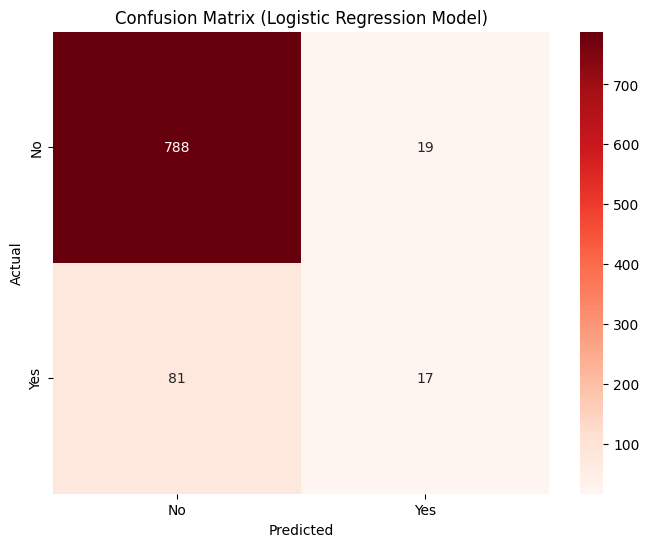

In [172]:
#Confusion matrix for Logistic Regression:
cm = confusion_matrix(y_test, lr_y_pred)

# Confusion Matrix Visualization:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds",
            xticklabels=["No", "Yes"],
            yticklabels=["No", "Yes"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Logistic Regression Model)")
plt.show()


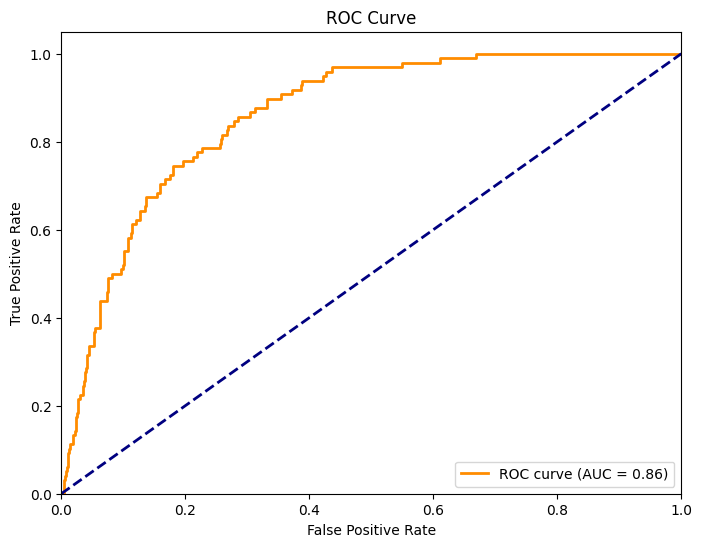

AUC: 0.86


In [173]:
# ROC curve and AUC
lr_y_pred_proba = lr_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, lr_y_pred_proba)
lr_roc_auc = auc(fpr, tpr)



# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {lr_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line (random classifier)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

#Print AUC Value
print(f"AUC: {lr_roc_auc:.2f}")

In [174]:
#Decision Tree Classifier

#Split Data Into Training and Testing Sets:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Record start time:
start_time = time.time()

#Create and train the Decision Tree model:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Record end time:
end_time = time.time()

# Calculate and Print training time:
dt_training_time = end_time - start_time
print(f"Training time: {dt_training_time} seconds")

#Make predictions on the test set:
dt_y_pred = dt_model.predict(X_test)

#Evaluate the model:
dt_accuracy = accuracy_score(y_test, dt_y_pred)
print(f"Accuracy: {dt_accuracy}")
print(classification_report(y_test, dt_y_pred))

Training time: 0.02632761001586914 seconds
Accuracy: 0.8718232044198895
              precision    recall  f1-score   support

           0       0.93      0.92      0.93       807
           1       0.42      0.47      0.44        98

    accuracy                           0.87       905
   macro avg       0.68      0.70      0.68       905
weighted avg       0.88      0.87      0.88       905



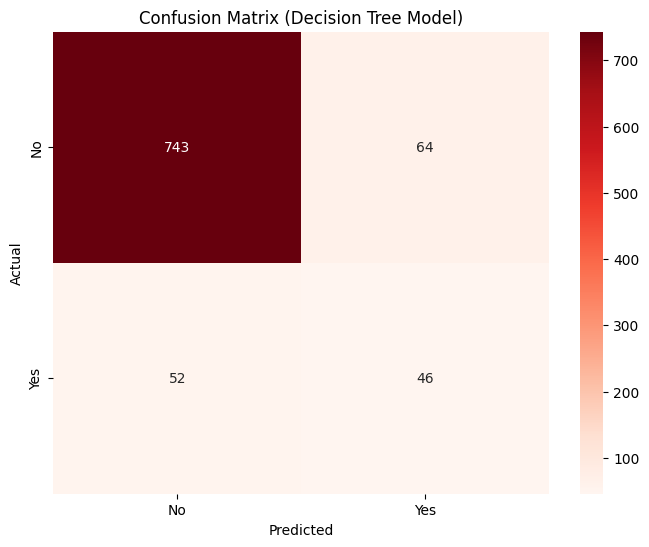

In [175]:
#Confusion matrix for Decision Tree Model:
cm = confusion_matrix(y_test, dt_y_pred)

# Create Confusion Matrix Visualization:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds",
            xticklabels=["No", "Yes"],
            yticklabels=["No", "Yes"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Decision Tree Model)")
plt.show()

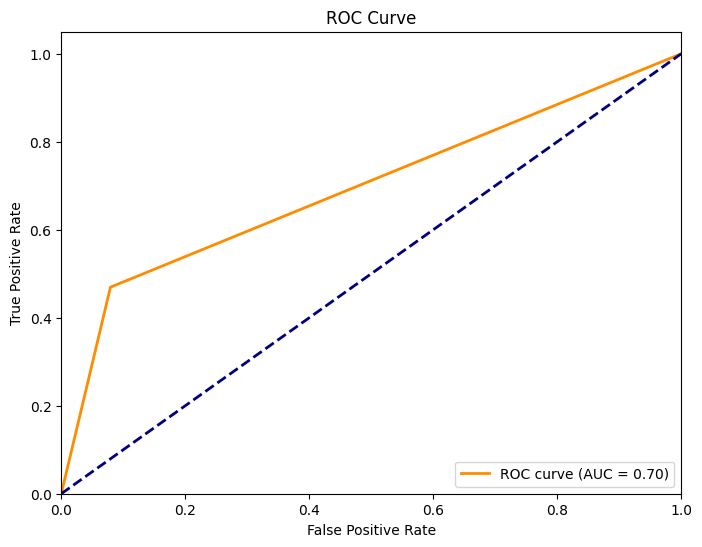

AUC: 0.70


In [176]:
# Calculate ROC curve and AUC:
dt_y_pred_proba = dt_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, dt_y_pred_proba)
dt_roc_auc = auc(fpr, tpr)



# Plot ROC curve:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {dt_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line (random classifier)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

print(f"AUC: {dt_roc_auc:.2f}")

In [177]:
#SVM

#Split Data Into Training and Testing Sets:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Record start time:
start_time = time.time()

#Feature scaling:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Create and train the SVM model:
svm_model = SVC(kernel='sigmoid', random_state=42, probability = True)  # You can try different kernels
svm_model.fit(X_train, y_train)

#Record end time:
end_time = time.time()

#Calculate and Print training time:
svm_training_time = end_time - start_time
print(f"Training time: {svm_training_time} seconds")

# Make predictions on the test set:
svm_y_pred = svm_model.predict(X_test)

# Evaluate the model with accuracy score and classification report:
svm_accuracy = accuracy_score(y_test, svm_y_pred)
print(f"Accuracy: {svm_accuracy}")
print(classification_report(y_test, svm_y_pred))

Training time: 1.116755485534668 seconds
Accuracy: 0.8552486187845304
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       807
           1       0.30      0.24      0.27        98

    accuracy                           0.86       905
   macro avg       0.60      0.59      0.59       905
weighted avg       0.84      0.86      0.85       905



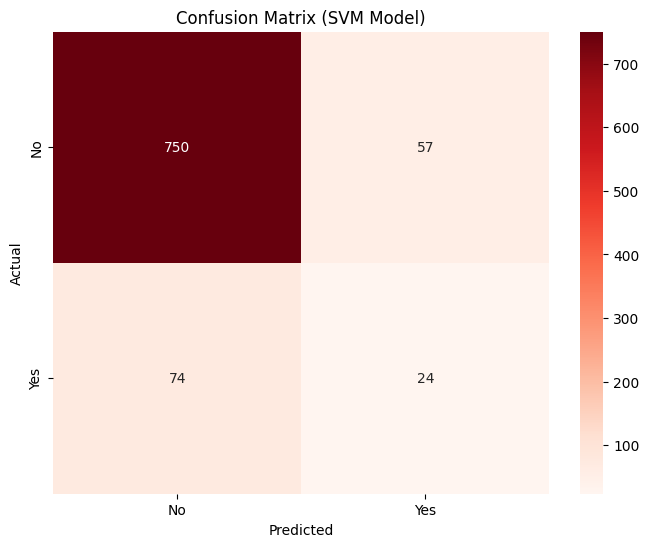

In [178]:
# Confusion matrix for SVM model:
cm = confusion_matrix(y_test, svm_y_pred)

# Confusion Matrix Visualization:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds",
            xticklabels=["No", "Yes"],
            yticklabels=["No", "Yes"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (SVM Model)")
plt.show()

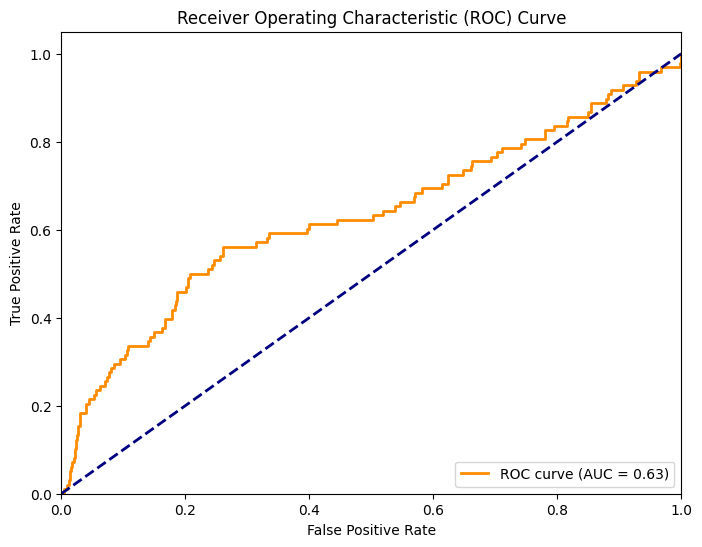

AUC: 0.63


In [179]:
# Calculate ROC curve and AUC:
svm_y_pred_proba = svm_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, svm_y_pred_proba)
svm_roc_auc = auc(fpr, tpr)



# Plot ROC curve:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {svm_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

#Print AUC Value
print(f"AUC: {svm_roc_auc:.2f}")


In [180]:
#K-NearestNeighbors

#Split Data Into Training and Testing Sets:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Record start time:
start_time = time.time()

# Feature scaling for KNN:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create and train the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Record end time
end_time = time.time()

# Calculate and Print training time
knn_training_time = end_time - start_time
print(f"Training time: {knn_training_time} seconds")

# Make predictions on the test set
knn_y_pred = knn_model.predict(X_test)

#  Evaluate the model
knn_accuracy = accuracy_score(y_test, knn_y_pred)
print(f"Accuracy: {knn_accuracy}")
print(classification_report(y_test, knn_y_pred))

Training time: 0.0071184635162353516 seconds
Accuracy: 0.8906077348066298
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       807
           1       0.49      0.18      0.27        98

    accuracy                           0.89       905
   macro avg       0.70      0.58      0.60       905
weighted avg       0.86      0.89      0.87       905



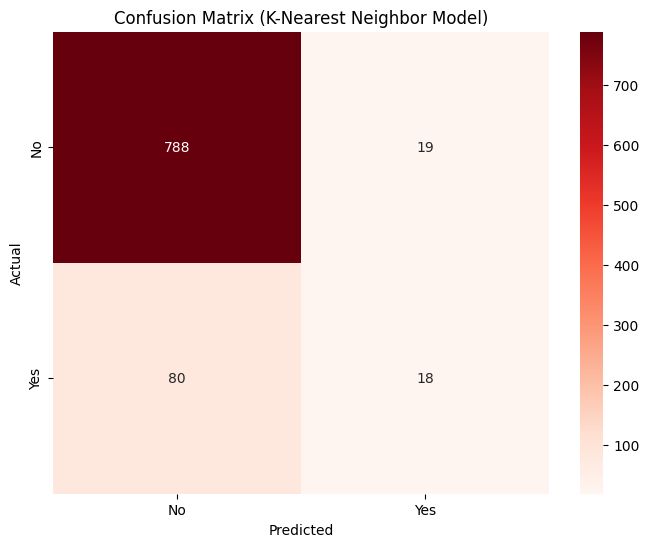

In [181]:
#Confusion matrix for K-Nearest Neighbors Model
cm = confusion_matrix(y_test, knn_y_pred)

# Create Confusion Matrix Visualization
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds",
            xticklabels=["No", "Yes"],
            yticklabels=["No", "Yes"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (K-Nearest Neighbor Model)")
plt.show()

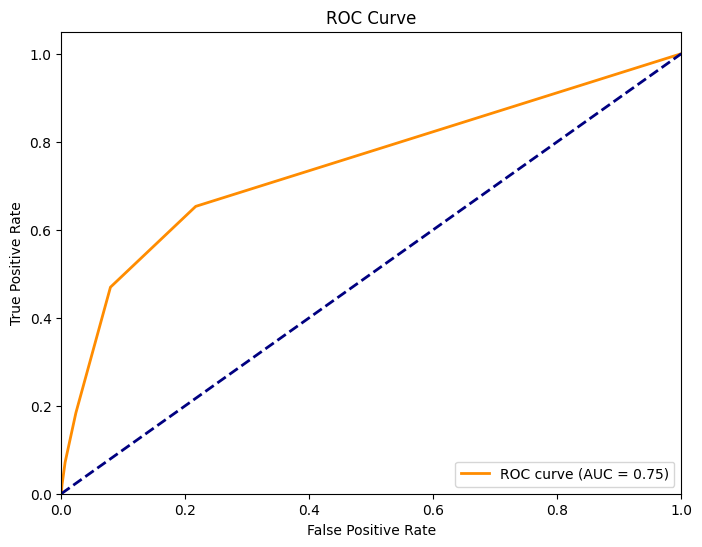

AUC: 0.75


In [182]:
knn_y_pred_proba = knn_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, knn_y_pred_proba)
knn_roc_auc = auc(fpr, tpr)



# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {knn_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line (random classifier)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

print(f"AUC: {knn_roc_auc:.2f}")

## **Evaluation**

Produced Tables and Graphs to compare and contrast the performance of various classification model at predicting wether or not potential customer will subscribe a term deposit or not.

In [188]:
# Create a dictionary to store the classification reports
reports = {
    "Logistic Regression": classification_report(y_test, lr_y_pred, output_dict=True),
    "Decision Tree": classification_report(y_test, dt_y_pred, output_dict=True),
    "SVM": classification_report(y_test, svm_y_pred, output_dict=True),
    "K-Nearest Neighbors": classification_report(y_test, knn_y_pred, output_dict=True)
}

# Create a list to store the data for the DataFrame
data = []
for model, report in reports.items():
    model_added = False
    for label, metrics in report.items():
        if label in ['0', '1', 'macro avg', 'weighted avg']:
            row = {
                'Model': model if not model_added else '',
                'Label': label,
                'Precision': metrics.get('precision', ''),
                'Recall': metrics.get('recall', ''),
                'F1-score': metrics.get('f1-score', ''),
                'Support': metrics.get('support', '')
            }
            data.append(row)
            model_added = True
        elif label == 'accuracy':
            row = {
                'Model': '',
                'Label': label,
                'Precision': '',
                'Recall': '',
                'F1-score': '',
                'Support': report.get(label) if isinstance(report.get(label), dict) and 'support' in report.get(label) else report.get(label, '')
            }
            data.append(row)

# Create a pandas DataFrame from the collected data
classification_reports = pd.DataFrame(data)

#Clean up Datframe

# Replace '0' and '1' with no and yes
classification_reports['Label'] = classification_reports['Label'].replace({'0': 'No', '1': 'Yes'})

# Format to display with two decimal places
numerical_cols = ['Precision', 'Recall', 'F1-score']
classification_reports[numerical_cols] = classification_reports[numerical_cols].applymap(lambda x: f'{x:.4f}' if isinstance(x, float) else x)

# Reorder columns
classification_reports = classification_reports[['Model', 'Label', 'Precision', 'Recall', 'F1-score', 'Support']]

# Add grid lines
classification_reports_styled = classification_reports.style.set_table_styles(
    [{'selector': 'th', 'props': [('border', '1px solid black')]},
     {'selector': 'td', 'props': [('border', '1px solid black')]}]
)

# Show dataframe
display(classification_reports_styled)  # Use 'display' instead of 'print'



<ipython-input-188-c397cd8b0b7d>:46: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  classification_reports[numerical_cols] = classification_reports[numerical_cols].applymap(lambda x: f'{x:.4f}' if isinstance(x, float) else x)


,Model,Label,Precision,Recall,F1-score,Support
0,Logistic Regression,No,0.9068,0.9765,0.9403,807.000000
1,,Yes,0.4722,0.1735,0.2537,98.000000
2,,accuracy,,,,0.889503
3,,macro avg,0.6895,0.5750,0.5970,905.000000
4,,weighted avg,0.8597,0.8895,0.8660,905.000000
5,Decision Tree,No,0.9346,0.9207,0.9276,807.000000
6,,Yes,0.4182,0.4694,0.4423,98.000000
7,,accuracy,,,,0.871823
8,,macro avg,0.6764,0.6950,0.6849,905.000000
9,,weighted avg,0.8787,0.8718,0.8750,905.000000


The above cell is a compilation of the classification reports from each of the four models created earlier in this notebook (Logistic Regression, Decision Trees, SVM, and K-Nearest Neighbors).  From the table above it is possible to compare and contrast the performance of each model to determine which would be the best for our business problem.

**Logistic Regression:**



*   When predicted if potential customers would not subscribe the  F1 Score was 0.9403 (2nd). From this it is possible to determine that this model ranks second in identifying instances when potential customers would not subscribe term deposits.
*   When predicted if potential customers would subscribe term deposits the  F1 score was 0.2537 (4th). From this it is possible to determine that this model ranks last in identifying instances when potential customers would subscribe term deposits.
*   Has weighted average precision of 0.8597 (3rd). From this can determine that this model ranks third when it comes to correctly classifying instances across all classes when taking into account class distribution.
*   Has weighted average recall of 0.8895 (3rd).  From this can determine that this model ranks 3rd when it comes to identifying positive instances (Yes subscribe deposit) when taking into account class distribution.
*   Has weighted average F1 score of 0.8660 (3rd). From this it is possible to determine that this model ranks third in identifying most positive instances while also haveing a low rate of false positives and false negatives
*   The accuracy of this model was 0.889503 (2nd). This model ranks second in predicting wether or not a potential customer will subscribe a term depost.



**Decision Trees**



*   When predicted if potential customers would not subscribe the  F1 Score was 0.9276 (3rd).From this it is possible to determine that this model ranks third in identifying instances when potential customers would not subscribe term deposits.
*   When predicted if potential customers would subscribe term deposits the F1 score was 0.4423 (1st).From this it is possible to determine that this model ranks first in identifying instances when potential customers would subscribe term deposits.
*   Has weighted average precision of 0.8787 (1st).From this can determine that this model ranks first when it comes to correctly classifying instances across all classes when taking into account class distribution.
*   Has weighted average recall of 0.8718 (2nd). From this can determine that this model ranks second when it comes to identifying positive instances (Yes subscribe deposit) when taking into account class distribution.
*   Has weighted average F1 score of 0.8750 (1st). From this it is possible to determine that this model ranks first in identifying most positive instances while also haveing a low rate of false positives and false negatives
*   The accuracy of this model was 0.871823 (3rd). This model ranks third in predicting wether or not a potential customer will subscribe a term depost.





**SVM**


*   When predicted if potential customers would not subscribe the  F1 Score was 0.9197 (4th). From this it is possible to determine that this model ranks last when it comes to identifying instances when potential customers would not subscribe term deposits.
*   When predicted if potential customers would subscribe term deposits the F1 score was 0.2682 (2nd). From this it is possible to determine that this model ranks second in identifying instances when potential customers would subscribe term deposits.
*   Has weighted average precision of 0.8437 (4th).  From this can determine that this model ranks last when it comes to identifying positive instances (Yes subscribe deposit) when taking into account class distribution.
*   Has weighted average recall of 0.8552 (4th).  From this can determine that this model ranks last when it comes to identifying positive instances (Yes subscribe deposit) when taking into account class distribution.
*   Has weighted average F1 score of 0.8491(4th). From this it is possible to determine that this model ranks last in identifying most positive instances while also having a low rate of false positives and false negatives
*   The accuracy of this model was 0.855249 (4th) This model ranks last in predicting wether or not a potential customer will subscribe a term depost.



**K-Nearest Neighbors**


*   When predicted if potential customers would not subscribe the  F1 Score was 0.9409 (1st). From this it is possible to determine that this model ranks first in identifying instances when potential customers would not subscribe term deposits.
*   When predicted if potential customers would subscribe term deposits the F1 score was 0.2667 (3rd). From this it is possible to determine that this model ranks 3rd in identifying instances when potential customers would subscribe term deposits.
*   Has weighted average precision of 0.8622 (2nd). From this can determine that this model ranks second when it comes to correctly classifying instances across all classes when taking into account class distribution.
*   Has weighted average recall of 0.8906 (1st). From this can determine that this model ranks first when it comes to identifying positive instances (Yes subscribe deposit) when taking into account class distribution.
*   Has weighted average F1 score of 0.8679 (2nd). From this it is possible to determine that this model ranks second in identifying most positive instances while also haveing a low rate of false positives and false negatives
*   The accuracy of this model was 0.890608 (1st) This model ranks first in predicting wether or not a potential customer will subscribe a term depost.





In [184]:

#Create Data Table containing Accuracy, AUC, and Training Time (seconds) for each model

models = ["Logistic Regression", "Decision Tree", "SVM", "K-Nearest Neighbors"]
accuracies = [lr_accuracy, dt_accuracy, svm_accuracy, knn_accuracy]
training_times = [lr_training_time, dt_training_time, svm_training_time, knn_training_time]
auc_values = [lr_roc_auc, dt_roc_auc, svm_roc_auc, knn_roc_auc]

model_table = pd.DataFrame({
       "Model": models,
       "Accuracy": accuracies,
       "AUC Values": auc_values,
       "Training Time (seconds)": training_times
   })

print(model_table)

                 Model  Accuracy  AUC Values  Training Time (seconds)
0  Logistic Regression  0.889503    0.861353                 0.793983
1        Decision Tree  0.871823    0.695041                 0.026328
2                  SVM  0.855249    0.631186                 1.116755
3  K-Nearest Neighbors  0.890608    0.745151                 0.007118


**Logistic Regression**



*   The AUC Value was calculated to be 0.889503. This model ranked first in distinguishing between positive and negative instances.
*   The training time was 0.793983 seconds.  This model ranked third in how long it took to train.



**Decision Tree**


*   The AUC Value was calculated to be 0.695041. This model ranked third in distinguishing between positive and negative instances.
*   The training time was 0.026328 seconds.  This model ranked second in how long it took to train.



**SVM**

*   The AUC Value was calculated to be 0.631186. This model ranked last in distinguishing between positive and negative instances.
*   The training time was 1.116755 seconds.  This model ranked last in how long it took to train.

**KNN**

*   The AUC Value was calculated to be 0.745151. This model ranked second in distinguishing between positive and negative instances.
*   The training time was 0.007118 seconds.  This model ranked first in how long it took to train.



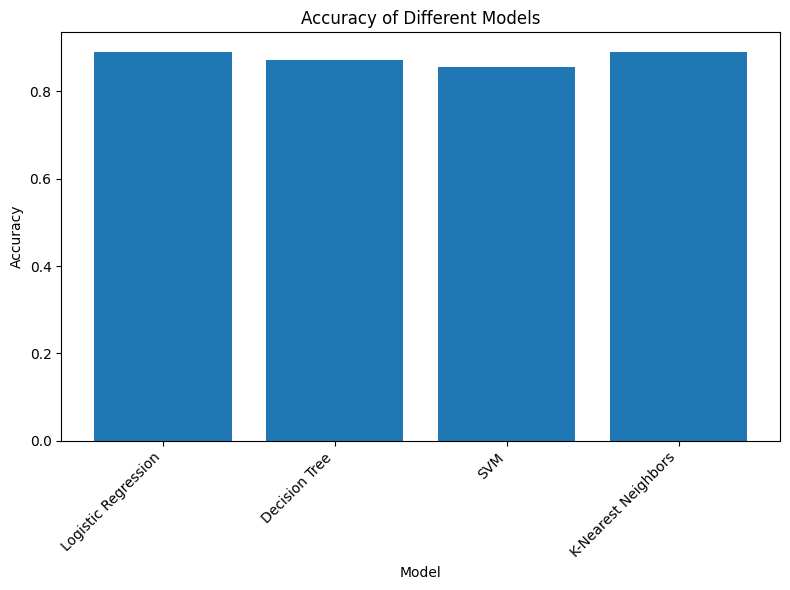

In [185]:
#Graph for Accuracy of Different Models
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
plt.bar(model_table["Model"], model_table["Accuracy"])
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Accuracy of Different Models")
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

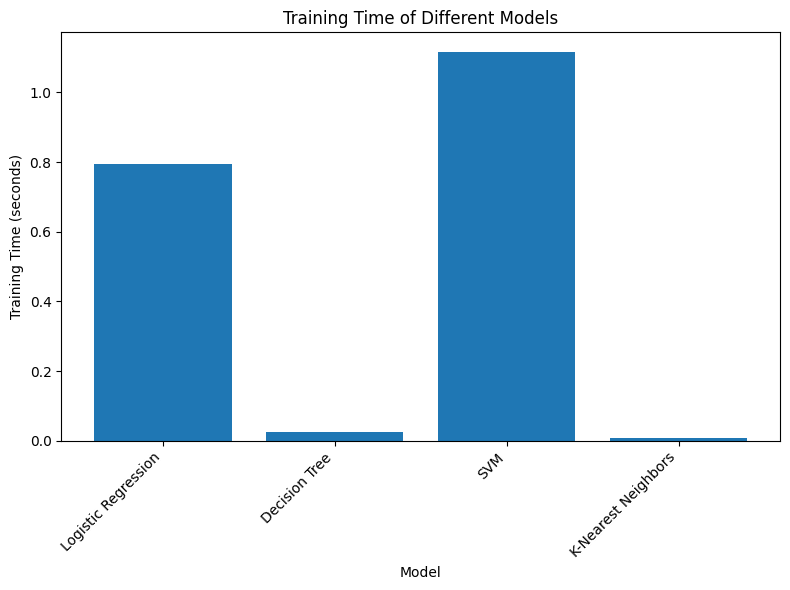

In [186]:
# Graph For Training Time of Different Models
plt.figure(figsize=(8, 6))
plt.bar(model_table["Model"], model_table["Training Time (seconds)"])
plt.xlabel("Model")
plt.ylabel("Training Time (seconds)")
plt.title("Training Time of Different Models")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

## **Deployment**
Summary of findings.



I believe that from the performance evaluation metrics for the decision tree model it can be deduced that this model is the best at predicting if clients will subscribe term deposits.  The Decision Tree model performed best at predicting clients who will subscribe term deposits (F1 for churn = 0.4423) while also minimizing false positives (high precision). While it has a lower AUC (suggesting that this model is not quite as effective at distinguishing between churn and non-churn overall), it is the best model for churn prediction because of it being the best at specifically identifying churn.

The K-Nearest Neighbor performed the best in terms of recall for clients that will subscribe term deposits and also performs well in terms of accuracy. While the F1 score for churn (0.2667) isn’t as strong as the Decision Tree's, KNN still offers a good trade-off between class discrimination (AUC), accuracy, and recall. I can suggest this model instead of decision trees if there is need for a model that’s fast to train and while also having a good recall for churn.

When analyzing the performance of Logistic Regression it is apparent that this model has the best AUC value and a good overall accuracy score, but it has a very poor F1 score when predicting if clients will subscribe term deposits (0.2537) indicating that it’s not the best model when it comes to predicting churn. However, if distinguishing between churn and non-churn is important, Logistic Regression could be considered, but it is important to note that this model will miss many potential churners.

I highly advise against using SVM because it performs poorly across all metrics, especially AUC, recall, and accuracy. This model performed the worst in regards to churn prediction.





To conclude I would suggest using the Decision Tree model to predict if a client will churn because it is the model that was best at predicting if clients will subscribe term deposits.  However, if training time is a factor I would suggest using the K-Nearest Neighbors model because its performance is not too far off of the Decision Tree model but trains much faster.  As next steps I would suggest looking at which features are most important in impacting wether or not a client will subscribe a term deposit or not.